In [1]:
from pathlib import Path
import os
import pandas as pd
import seaborn as sns

pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

from datatype_recovery.models.dataset import load_dataset_from_path
from datatype_recovery.models.dataset.encoding import *
from datatype_recovery.models.dataset.balance import plot_dataset_balance

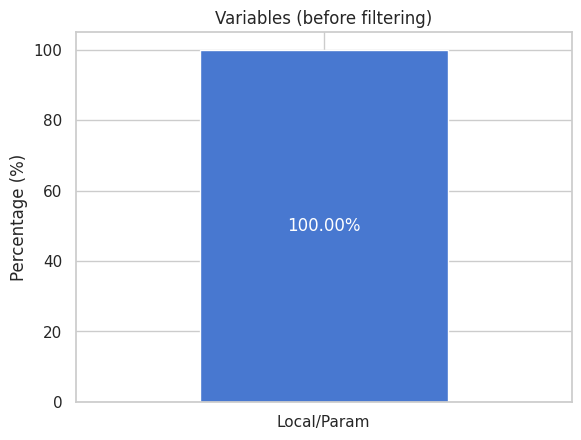

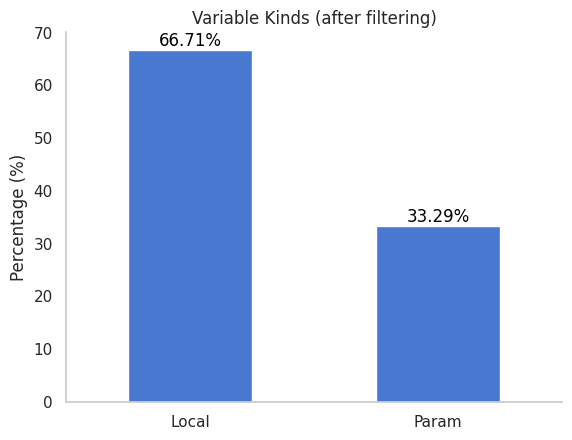

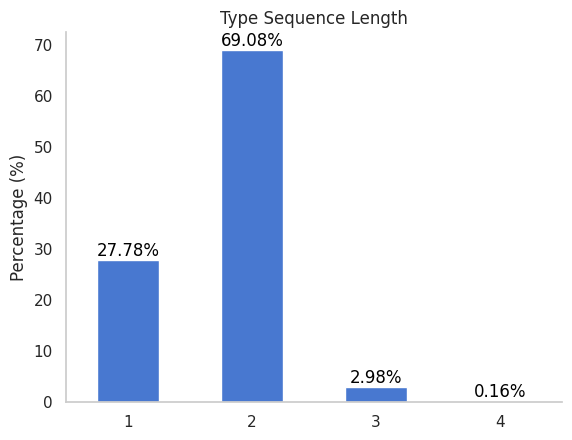

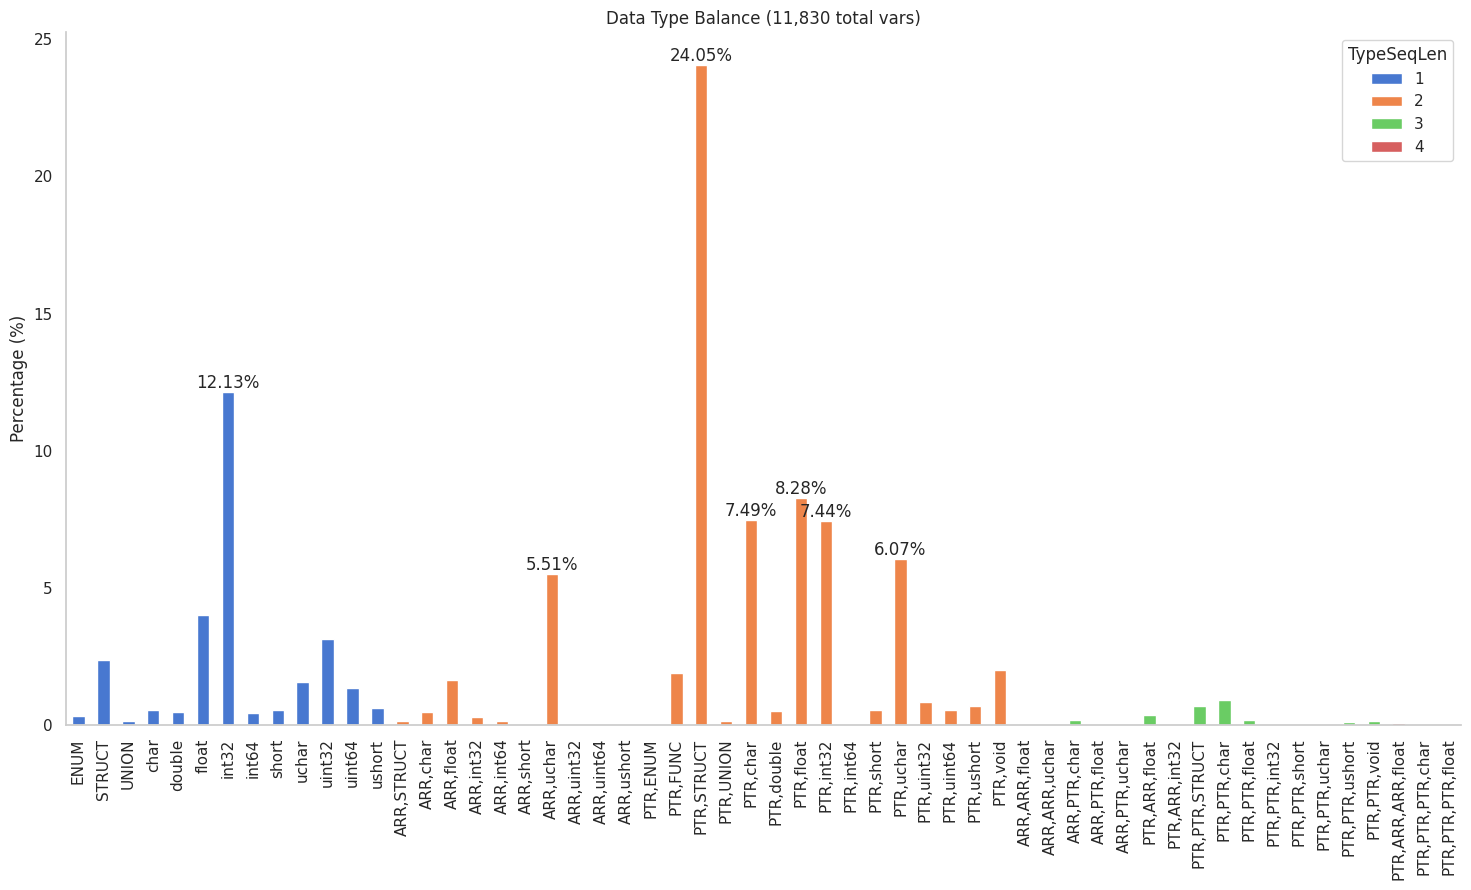

In [2]:
# ----------------------------------------------------------
# manual parameters
MANUAL_DATASET_PATH = Path.home()/'datasets/test_balance'
drop_comp = True
drop_return_types = True    # right now TypeSeqDatset is doing this
# ----------------------------------------------------------
# command-line parameters (take the env-var-specified params if present)
dataset_path = Path(os.environ['DATASET']) if 'DATASET' in os.environ else MANUAL_DATASET_PATH
# ----------------------------------------------------------


# context: talk, notebook, paper, poster
# palette: muted, Paired, hls, husl, pastel, bright, deep, dark, colorblind
sns.set_theme(style='whitegrid', context='notebook', palette='muted')

var_df, bal_df = plot_dataset_balance(dataset_path, drop_comp, drop_return_types)

In [9]:
var_df['LeafType'] = var_df.TypeSeq_Debug.apply(lambda x: x.split(',')[-1])
var_df['NumRefs'] = var_df.Signature.apply(lambda sig: len(sig.split(',')))

In [10]:
var_df

,index,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,...,PtrL1,PtrL2,PtrL3,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip,Label,LeafType,NumRefs
0,3,1084377,"27,64,89",lVar2,int64,register,rax,0.0,BUILTIN,int64,...,P,L,L,1000,l,False,False,Local/Param,STRUCT,3
1,4,1084377,"43,56,101",lVar3,int64,register,rax,0.0,BUILTIN,int64,...,P,L,L,1000,l,False,False,Local/Param,STRUCT,3
2,17,1084990,"2676,2739,2743,2...",pfVar4,float*,register,rax,0.0,PTR,"PTR,float",...,P,L,L,1000,l,False,False,Local/Param,STRUCT,9
3,18,1084990,"3575,3596",uVar5,uint64,register,rax,0.0,BUILTIN,uint64,...,P,L,L,1000,l,False,False,Local/Param,STRUCT,2
4,26,1084990,"1897,2936",local_240,uint64,stack,NaN,-576.0,BUILTIN,uint64,...,P,L,L,1000,l,False,False,Local/Param,STRUCT,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11825,14717,1425126,"252,257,275,280,...",cVar1,char,register,al,0.0,BUILTIN,char,...,L,L,L,1003,l,False,False,Local/Param,char,12
11826,3001,1376264,"470,568,606,606,...",local_c4,int32,stack,NaN,-196.0,BUILTIN,int32,...,L,L,L,1000,l,False,False,Local/Param,int32,33
11827,2669,1169009,"210,252",param_4,int32,register,ecx,8.0,BUILTIN,int32,...,L,L,L,1002,p,False,False,Local/Param,int32,2
11828,534,1389857,"806,825,1034",param_3,int32,register,edx,16.0,BUILTIN,int32,...,L,L,L,1000,p,False,False,Local/Param,int32,3


<Axes: title={'center': 'Dataset by LeafCategory'}, xlabel='LeafCategory'>

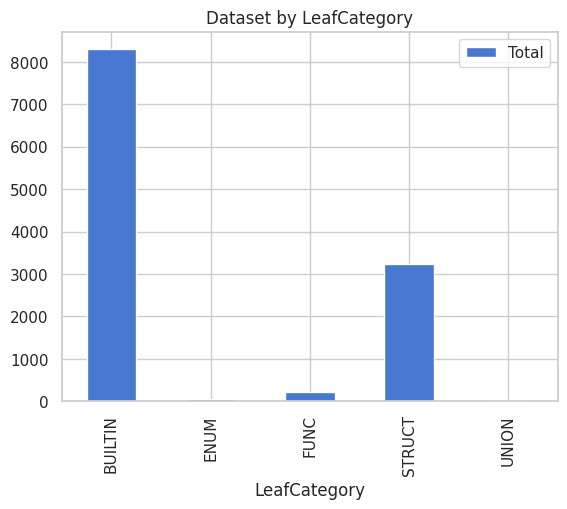

In [5]:
total_by_lcat = var_df.groupby('LeafCategory').count()[['FunctionStart']].rename({'FunctionStart':'Total'},axis=1)
total_by_lcat.plot(kind='bar', title='Dataset by LeafCategory')

<Axes: title={'center': 'Dataset by LeafType'}, xlabel='LeafType'>

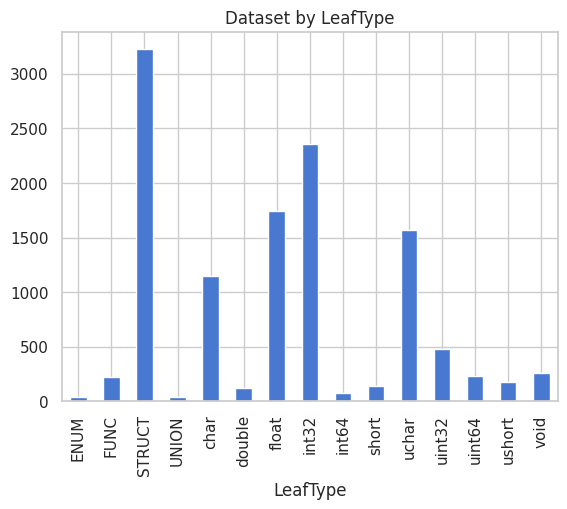

In [42]:
var_df.groupby('LeafType').count().FunctionStart.plot(kind='bar',title='Dataset by LeafType')

<Axes: title={'center': 'Pointer Levels'}, xlabel='PtrLevels'>

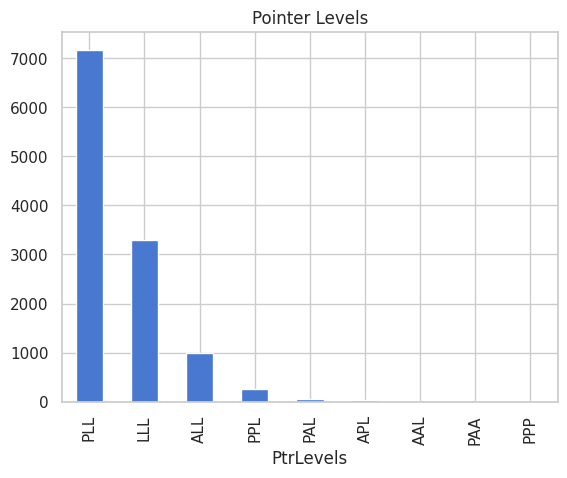

In [27]:
var_df.groupby('PtrLevels').count().FunctionStart.sort_values(ascending=False).plot(
    kind='bar', title='Pointer Levels'
)

<Axes: xlabel='PtrL1'>

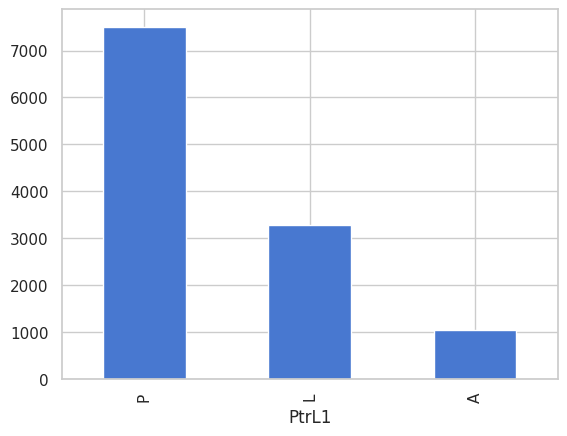

In [39]:
var_df.groupby('PtrL1').count().FunctionStart.sort_values(ascending=False).plot(kind='bar')

<Axes: title={'center': 'Variables by # References'}, xlabel='NumRefs'>

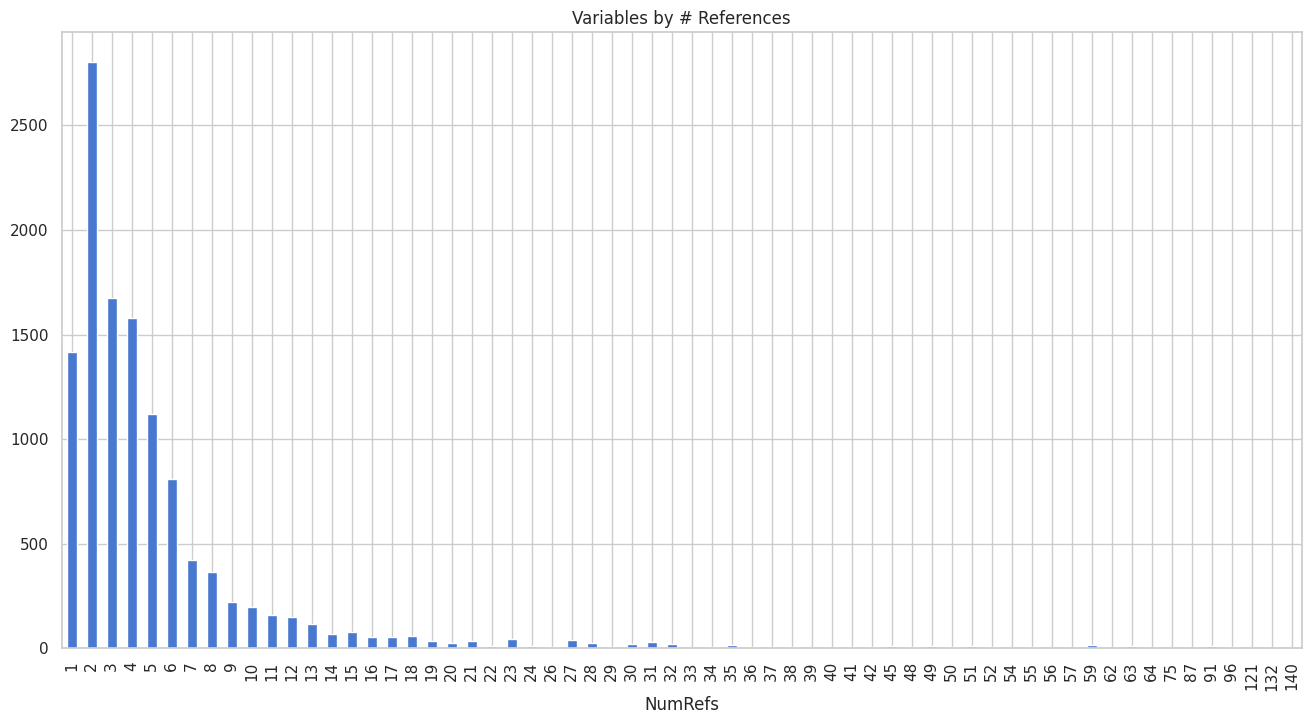

In [15]:
var_df.groupby('NumRefs').count().FunctionStart.plot(
    title='Variables by # References',
    kind='bar', figsize=(16,8), #ylim=(0, 500)
)